## Research Question

  * Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

## Bonus Questions (Optional)

* What is the most popular hour for returning cars?
* What station is the most popular?
  * Overall?
  * At the most popular picking hour?
* What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
  * Overall?
  * At the most popular picking hour?
* Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

**Importing libraries**

In [10]:
# Importing the Pandas Library
import pandas as pd

# Importing the Numpy Library
import numpy as np

# Import datetime
import datetime 

# Import matplotlib
import matplotlib.pyplot as plt

In [11]:
# loading the database
df = pd.read_csv('Autolib_dataset.csv')

df.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14


In [12]:
# Getting Information on data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

# **Data cleaning**

**Completeness**

Checking for any missing values across the dataset and any null values.

In [13]:
# Finding any null values
df.isnull()
df.isnull().any()
df.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

**Accuracy**

Checking that the information in the respective columns meets the standards

In [14]:
# Standardization - Fixing messy column names-  All columns will be in lowercase and will avoid any white spaces on the columns 
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')', '')
df.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,displayed_comment,id,...,scheduled_at,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**Validity**

Checking the validity of the data

In [15]:
# To clean our data we will have some steps.

# To check the validity of the data , we will drop columns that were irrelevant to our study.
# In this case the columns were :

# Displayed comment , which contained null values
# Scheduled at , which contained null values
# Charging Status ,which was not important in our analysis
# Charge Slots , which did not contain information that was useful in this analysis
# Subscription Status , which was not important in our analysis
# Status , which did not contain information that was useful in the analysis
# Geo point which did not contain information useful to the analysis
# Station type as it did not contain information that was useful in our study.
# Address as we had the postal code and Id columns already to help us identify the stations
# Rental status as it did not contain any information useful to this analysis.
# Cars as it was redundant due to the Blue counter car column that contained the same information.

# Drop the columns irrelevant to our analysis
to_drop = ['geo_point','displayed_comment','charge_slots','id','cars', 'address', 'scheduled_at', 'charging_status', 'slots', 'station_type', 'status', 'subscription_status']
df.drop(to_drop, axis=1, inplace=True)

**Consistency**

Checking for data that are duplicated within the dataset and then dropping the duplicated value.

In [16]:
# Check any duplicates values
df.duplicated().value_counts()

False    5000
dtype: int64

**Uniformity**

Ensure that our data is accurate  and the data types are accurate 

In [17]:
from datetime import datetime 

df['Date'] = pd.to_datetime(df[['year','month','day','hour','minute']])

df.head(5)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,rental_status,year,month,day,hour,minute,Date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2018,4,8,11,43,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,2018-04-06 07:24:00
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14,2018-04-03 20:14:00
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37,2018-04-04 04:37:00
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,2018-04-08 17:23:00


# **Data Analysis**

After this process we will use the remaining columns in this analysis.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bluecar_counter     5000 non-null   int64         
 1   utilib_counter      5000 non-null   int64         
 2   utilib_1.4_counter  5000 non-null   int64         
 3   city                5000 non-null   object        
 4   kind                5000 non-null   object        
 5   postal_code         5000 non-null   int64         
 6   public_name         5000 non-null   object        
 7   rental_status       5000 non-null   object        
 8   year                5000 non-null   int64         
 9   month               5000 non-null   int64         
 10  day                 5000 non-null   int64         
 11  hour                5000 non-null   int64         
 12  minute              5000 non-null   int64         
 13  Date                5000 non-null   datetime64[n

In [19]:
df.head(3)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,rental_status,year,month,day,hour,minute,Date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2018,4,8,11,43,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,2018-04-06 07:24:00
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14,2018-04-03 20:14:00


In [20]:
# Drop all the cities that are not equal to Paris as we are interested in Paris
df = df.drop(df[(df.city != 'Paris')].index)
df.head(5)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,rental_status,year,month,day,hour,minute,Date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2018,4,8,11,43,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,2018-04-06 07:24:00
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37,2018-04-04 04:37:00
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,2018-04-08 17:23:00
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,2018,4,6,7,2,2018-04-06 07:02:00


In [21]:
# Get the difference which will tell whether a car was picked up, returned, or nothing happened.

df['bluecardifference'] = df['bluecar_counter'].diff()
df['utilibdifference'] = df['utilib_counter'].diff()
df['utilib14']= df['utilib_1.4_counter'].diff()

df.head(5)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,rental_status,year,month,day,hour,minute,Date,bluecardifference,utilibdifference,utilib14
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37,2018-04-04 04:37:00,-3.0,1.0,0.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,2018-04-08 17:23:00,0.0,-1.0,0.0
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,2018,4,6,7,2,2018-04-06 07:02:00,-3.0,0.0,0.0


Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

CALCULATIONS FOR BLUE CARS

In [22]:
# what is the most popular hour for picking cars?

df2 = df[(df.bluecardifference < 0)
& (df.rental_status == 'operational')
& (df.kind != 'CENTER')
].groupby(['bluecardifference']).agg({'hour':'max'})

df2

,hour
bluecardifference,
-7.0,7
-6.0,21
-5.0,23
-4.0,23
-3.0,23
-2.0,23
-1.0,23


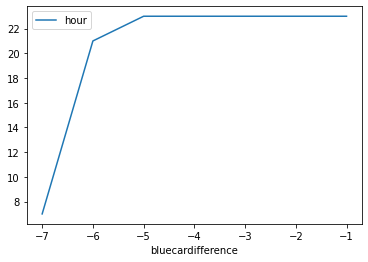

In [23]:
# Graph of the most popular hour for picking cars?

df2 = df[(df.bluecardifference < 0)
& (df.rental_status == 'operational')
& (df.kind != 'CENTER')
].groupby(['bluecardifference']).agg({'hour':'max'}).plot()


What is the most popular hour for returning cars?

In [24]:
# What is the most popular hour for returning cars?
df2 =df[(df.bluecardifference > 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'bluecardifference']).agg({'hour': 'max'})

df2

,hour
bluecardifference,
1.0,23
2.0,23
3.0,23
4.0,23
5.0,23
6.0,23


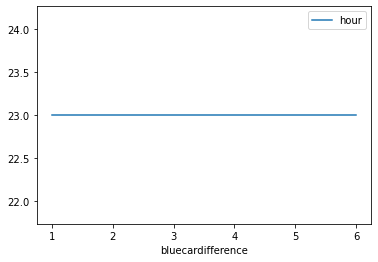

In [25]:
# Popular hour for returning cars?
df2 =df[(df.bluecardifference > 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'bluecardifference']).agg({'hour': 'max'}).plot()

What station is the most popular? Overall? At the most popular picking hour?

In [26]:
# What station is the most popular overall?
df['public_name'].value_counts()

Paris/Porte de Montrouge/8         13
Paris/Voltaire/182                 11
Paris/Philippe Auguste/126         11
Paris/Courcelles/69                11
Paris/Mathis/35                    11
                                   ..
Paris/Jean Veber/3                  1
Paris/Porte Pouchet/6               1
Paris/FÃ©dÃ©ration/10               1
Paris/Faubourg-Saint-Martin/168     1
Paris/Manin/1                       1
Name: public_name, Length: 605, dtype: int64

In [27]:
# What station is the most popular at the most popular picking hour?

df[(df.hour == 21)
& (df.bluecardifference < 0)
& (df.kind != 'CENTER')
]['public_name'].value_counts().head(5)

Paris/Voltaire/182           3
Paris/Tronchet/19            3
Paris/Saint-MandÃ©/94        2
Paris/HÃ´pital/47            2
Paris/Etoile Foch/Parking    2
Name: public_name, dtype: int64

What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code? Overall? At the most popular picking hour?

In [28]:
# What postal code is the most popular for picking up Blue cars
# Find most popular postal code

df[(df.bluecardifference < 0)
& (df.bluecar_counter)]['postal_code'].value_counts().head(5)

75015    31
75013    30
75017    28
75019    27
75018    23
Name: postal_code, dtype: int64

In [29]:
# Find postal code for most popular station and compare
df[(df.public_name =='Paris/Porte de Montrouge/8')]['postal_code'].unique()


array([75014])

In [30]:
# Does the most popular station belong to that postal code at the most popular picking hour?
# Find postal code for most popular station

df[(df.public_name == 'Paris/Voltaire/182')
& (df.bluecardifference < 0)
&(df.kind != 'CENTER')
]['postal_code'].unique()


array([75011])

In [31]:
# Find most popular postal code and compare

df[(df.hour == 21)
& (df.bluecardifference < 0)
& (df.kind != 'CENTER')
]['postal_code'].value_counts().head(5)

75008    8
75012    7
75013    7
75007    6
75014    5
Name: postal_code, dtype: int64

CALCULATIONS FOR UTILIB CARS

In [32]:
# What is the most popular hour for picking utilib cars?

df2 =df[(df.utilibdifference < 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilibdifference']).agg({'hour': 'max'})

df2

,hour
utilibdifference,
-2.0,22
-1.0,23


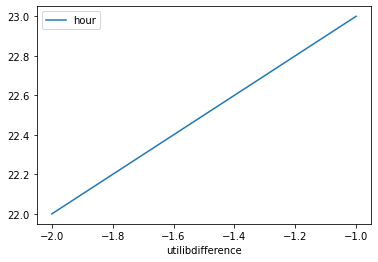

In [33]:
# The most popular hour for picking utilib cars

df2 =df[(df.utilibdifference < 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilibdifference']).agg({'hour': 'max'}).plot()


In [34]:
# What is the most popular hour for returning utilib cars?

df2 =df[(df.utilibdifference > 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilibdifference']).agg({'hour': 'max'})

df2

,hour
utilibdifference,
1.0,23
2.0,21


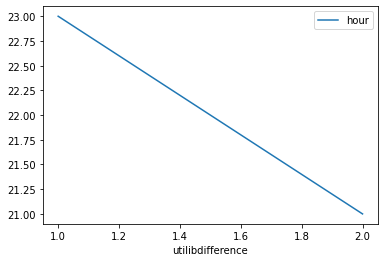

In [35]:
# The most popular hour for returning utilib cars

df2 =df[(df.utilibdifference > 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilibdifference']).agg({'hour': 'max'}).plot()


In [36]:
# What station is the most popular at the most popular picking hour?

df[(df.hour == 22)
&(df.utilibdifference < 0) 
& (df.kind != 'CENTER')
]['public_name'].value_counts().head(2)

Paris/Adolphe Yvon/6    1
Paris/Bourdon/9         1
Name: public_name, dtype: int64

In [37]:
# What postal code is the most popular for picking up utilib cars
# Find most popular postal code 

df[(df.utilibdifference < 0) 
]['postal_code'].value_counts().head(5)

75015    15
75016    14
75017    13
75011    11
75020    11
Name: postal_code, dtype: int64

CALCULATIONS FOR UTILIB 1.4 CARS

In [38]:
# What is the most popular hour for picking utilib cars?
df2 =df[(df.utilib14 < 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilib14']).agg({'hour': 'max'})
 

df2

,hour
utilib14,
-2.0,23
-1.0,23


In [39]:
# What is the most popular hour for returning utilib 1.4 cars?

df2 =df[(df.utilib14 > 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilib14']).agg({'hour': 'max'})

df2

,hour
utilib14,
1.0,23
2.0,23
3.0,13


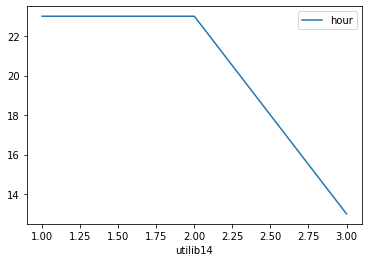

In [40]:
# The most popular hour for returning utilib 1.4 cars

df2 =df[(df.utilib14 > 0) 
& (df.rental_status == 'operational') 
& (df.kind != 'CENTER')
 ].groupby( [ 'utilib14']).agg({'hour': 'max'}).plot()


In [41]:
# What station is the most popular at the most popular picking hour?

df[(df.hour == 23)
&(df.utilib14 < 0) 
& (df.kind != 'CENTER')
]['public_name'].value_counts().head(1)

Paris/Danton/8    1
Name: public_name, dtype: int64

In [42]:
# What postal code is the most popular for picking up utilib 1.4 cars
# Find most popular postal code 

df[(df.utilib14 < 0) 
]['postal_code'].value_counts().head(3)

75015    26
75012    23
75016    23
Name: postal_code, dtype: int64